<a href="https://colab.research.google.com/github/Akasonal/MNIST-classification-using-LENET/blob/main/Mnist_Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms

In [2]:
#getting current working directory
import os
os.getcwd()

'/content'

In [3]:
#loading the dataset
train_dataset=torchvision.datasets.MNIST('/content',train=True,transform=transforms.ToTensor(),download=True)
trest_dataset=torchvision.datasets.MNIST('/content',train=False,transform=transforms.ToTensor(),download=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=100,shuffle=True)

In [5]:
test_dataloader=torch.utils.data.DataLoader(dataset=trest_dataset,shuffle=True,batch_size=100)

In [6]:
data=iter(train_dataloader)
samples,labels=next(data)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")

number of samplestorch.Size([100, 1, 28, 28])
number of labels torch.Size([100])


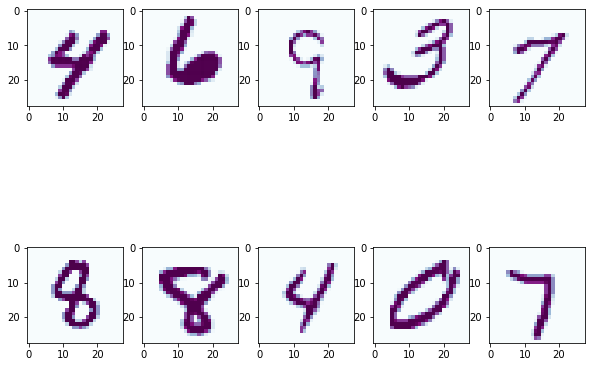

In [7]:
#printing some of the digits
plt.figure(figsize=(10,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(samples[i][0],cmap='BuPu')
plt.show()

In [8]:
import torch.nn.functional as F

In [125]:
class MNIST(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,hidden_size3,hidden_size,output):
        super(MNIST,self).__init__()
        self.f_connected1=nn.Linear(input_size,hidden_size1)
        self.f_connected2=nn.Linear(hidden_size1,hidden_size2)
        self.f_connected3=nn.Linear(hidden_size2,hidden_size3)
        self.f_connected4=nn.Linear(hidden_size3,hidden_size)
        self.out_connected=nn.Linear(hidden_size,output)
    def forward(self,x):
        out=F.relu(self.f_connected1(x)) 
        out=F.relu(self.f_connected2(out))
        out=F.relu(self.f_connected3(out))
        out=F.relu(self.f_connected4(out))
        output=self.out_connected(out)
        return out

In [126]:
input_size=784   #28X28 pixel of image
hidden_size1=200 #size of 1st hidden layer(number of perceptron)
hidden_size2=150 #size of second hidden layer
hidden_size3=100 #size of third hidden layer
hidden_size=80   #size of fourth hidden layer
output =10       #output layer
bach_size=100
lr_rate=0.01

In [127]:
Mnist_model=MNIST(input_size,hidden_size1,hidden_size2,hidden_size3,hidden_size,output)

In [128]:
print(Mnist_model.parameters)

<bound method Module.parameters of MNIST(
  (f_connected1): Linear(in_features=784, out_features=200, bias=True)
  (f_connected2): Linear(in_features=200, out_features=150, bias=True)
  (f_connected3): Linear(in_features=150, out_features=100, bias=True)
  (f_connected4): Linear(in_features=100, out_features=80, bias=True)
  (out_connected): Linear(in_features=80, out_features=10, bias=True)
)>


In [129]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(Mnist_model.parameters(),lr=lr_rate)

In [130]:
#loading the gpu
if torch.cuda.is_available():
    device=toch.device('cuda')

In [131]:
torch.cuda.is_available()

False

In [132]:
len(train_dataloader)

600

In [140]:
num_epochs=10
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_dataloader):
    images=images.reshape(-1,28*28)
    ##forward connection
    output=Mnist_model(images)
    Loss=loss(output,labels)
    ##calculating gradient
    optimizer.zero_grad()    #it will not cumulate the gradient result after every epoch
    Loss.backward()          #it will do backward propagation
    optimizer.step()         #update the parameter after every iteration

    if (i+1)%100==0:
      print(f"epoch={epoch+1}/{num_epochs}, step={i+1}/{len(train_dataloader)} ,loss= {Loss.item()}")
    


 

epoch=1/10, step=100/600 ,loss= 0.003516988828778267
epoch=1/10, step=200/600 ,loss= 0.004937499295920134
epoch=1/10, step=300/600 ,loss= 0.04037032276391983
epoch=1/10, step=400/600 ,loss= 0.17109692096710205
epoch=1/10, step=500/600 ,loss= 0.006210607476532459
epoch=1/10, step=600/600 ,loss= 0.003879058873280883
epoch=2/10, step=100/600 ,loss= 0.005767567083239555
epoch=2/10, step=200/600 ,loss= 0.02196590229868889
epoch=2/10, step=300/600 ,loss= 0.02322271279990673
epoch=2/10, step=400/600 ,loss= 0.10116884857416153
epoch=2/10, step=500/600 ,loss= 0.02494707517325878
epoch=2/10, step=600/600 ,loss= 0.009710550308227539
epoch=3/10, step=100/600 ,loss= 0.15166053175926208
epoch=3/10, step=200/600 ,loss= 0.012060143984854221
epoch=3/10, step=300/600 ,loss= 0.009521094150841236
epoch=3/10, step=400/600 ,loss= 0.0005198249127715826
epoch=3/10, step=500/600 ,loss= 0.0249006487429142
epoch=3/10, step=600/600 ,loss= 0.02803320437669754
epoch=4/10, step=100/600 ,loss= 0.050707753747701645
ep

In [155]:
#final Prediction
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=Mnist_model(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples=labels.shape[0]
        n_correct=(prediction==labels).sum().item()
    accuracy=(n_correct/n_samples)*100 
    print(f"{accuracy}")

97.0


In [159]:
predicted=[]
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=Mnist_model(images)
        labels=labels
        _,prediction=torch.max(output,1)
predicted.append(prediction)

In [162]:
print(prediction)

tensor([2, 0, 3, 8, 9, 6, 8, 3, 0, 3, 3, 9, 0, 9, 4, 1, 9, 4, 6, 8, 1, 2, 6, 7,
        9, 0, 8, 0, 0, 2, 2, 6, 2, 2, 2, 8, 3, 4, 4, 1, 0, 8, 8, 2, 6, 2, 7, 4,
        2, 4, 7, 8, 3, 6, 1, 3, 0, 0, 0, 7, 1, 4, 3, 7, 5, 2, 7, 4, 5, 8, 0, 4,
        2, 0, 1, 5, 1, 2, 0, 8, 1, 6, 2, 6, 5, 9, 4, 3, 6, 6, 3, 8, 4, 1, 9, 6,
        3, 8, 7, 4])
